<center> 
    <img src="./logo_UTN.svg" height=”250” width=200”>
</center>

<h1><center> TAREA SEMANAL 6 <center></h1>
    <h2><center> TEORIA DE LOS CIRCUITOS 2<center></h2>
    <h3>Destefano, Martin</h3>
        
        


 1) Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
 
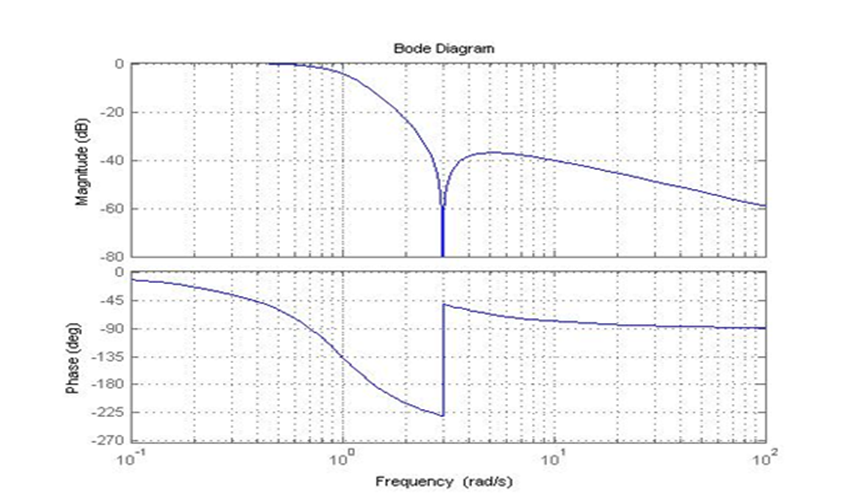



a)	Determine la expresión de H(s) del filtro pasa-altos normalizado                    
b)	Realizar el diagrama de polos y ceros de H(s)                                             

A simple vista vemos que un Notch pasabajos, y que $\omega_{z} = 3 $ y para que sea una ganacia unitaria $ K = 1/9 $. De la experiencia de los ejercicios vistos, noto que tanto el grafico de Bode y el de fase son distintos. En el de bode tengo mayor atenuacion en la banda de rechazo que en otros casos y en el de fase tengo una pendiente negativa de -135°/dec. Por lo tanto tendre 3 polos que me esten aportan 45° cada uno. Si los dos polos que se que estan por defecto son complejos conjugados, el faltante debe estar sobre el eje ordenado por la division $ \pi/3 $


$$ H(S) = K\frac{S^2+\omega_{z}^2}{(S^2+S\frac{\omega_{p}}{Q}+\omega_{p}^2)(S+P_{3})} $$

Entonces la transferencia queda: 

$$ H(S) = \frac{1}{9}\frac{S^2+3^2}{(S^2+S+1^2)(S+1)} $$

Simulo para comprobar: 

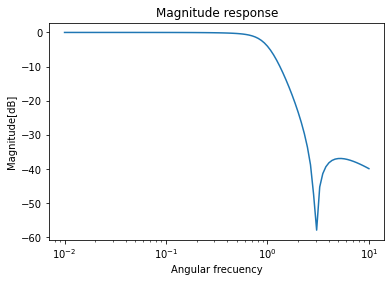

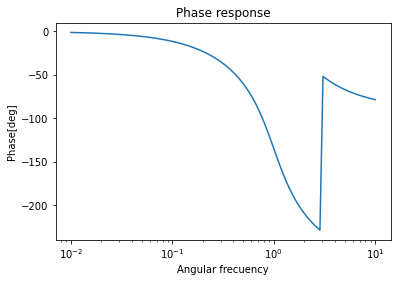

In [2]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
import matplotlib.pyplot as plt
    

num1 = [1, 1]
num2 = [1,1,1]
k = 1/9
myFilter_hand = sig.TransferFunction([k*1,0,k*3**2], np.polymul(num1,num2))

# Graphics
w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()

En $ \omega = 3 $ tenemos un punto importante, como debe ser, ya que la plantilla nos pide que la frecuencia de corte sean 300Hz, que sera nuestra frecuencia de normalizacion. Con esa informacion y sabiendo que tenemos un cero en 100 Hz que nos determinara la frecuencia de stop nos damos cuenta que la normalizacion del pasaaltos es: 

$$ \omega_{cn} = \frac{\omega{c}}{\omega_{c}} = 1$$ 
$$ \omega_{sn} = \frac{\omega{s}}{\omega_{c}} = 1/3$$ 

Y en la plantilla pasabajos: 

$$ \Omega_{LPs} = \frac{1}{\omega_{sn}} = 3$$ 

Ahora resta aplicar el nucleo de transformacion: $K(S) = \frac{1}{S}$

$$ H_{HP}(S) = \frac{1}{9}\frac{9S^3+S}{S^3+2S^2+2S+1} $$ 


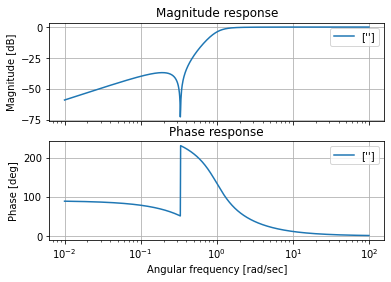

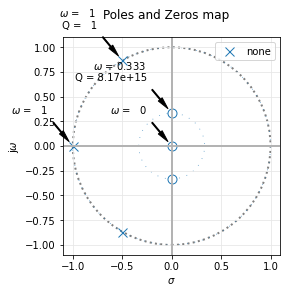

In [3]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
import matplotlib.pyplot as plt

k = 1/9
num_lp_hand = [k*9,0,k*1,0]
den_lp_hand = [1,2,2,1]


myFilter_hand = sig.TransferFunction(num_lp_hand, den_lp_hand)

# Graphics


sp.bodePlot(myFilter_hand,1)
sp.pzmap(myFilter_hand,2)

print("")

### Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

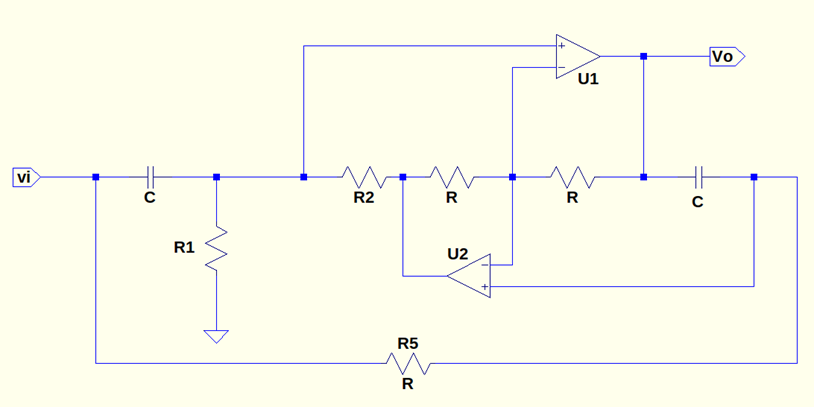

Primero separo la H(S) en las SOS correspondientes: 

$$ H(S) = \frac{S}{S+1}\frac{S^2+1/9}{S^2+S+1} $$

Mediante el metodo de nodos llego a la siguiente expresion de la transferencia del circuito: 

$$ T(S) = \frac{S^2+\frac{1}{R_{5}C_{1}C_{2}R_{2}}(\frac{R_{3}}{R_{1}}-\frac{R_{2}}{R_{4}})}{S^2+\frac{S}{R_{1}C_{1}}+\frac{R_{3}}{R_{4}R_{5}R_{2}C_{1}C_{2}}]} $$

Resolucion en papel: 

In [4]:
from IPython.display import IFrame
IFrame("./TS6.pdf", width=1000, height=500)


Por lo tanto voy a tener que adoptar valores: 

Si: 

$ R = R = 1 $ - 
$ C_{1} = C_{2} = 1 $ -
$ R_{1} = 1 $
$$ R_{2} = \frac{8}{9} $$ 

$$ R_{5} = \frac{9}{8} $$


Con su respectiva simulacion normalizada: 

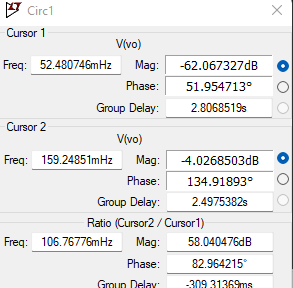

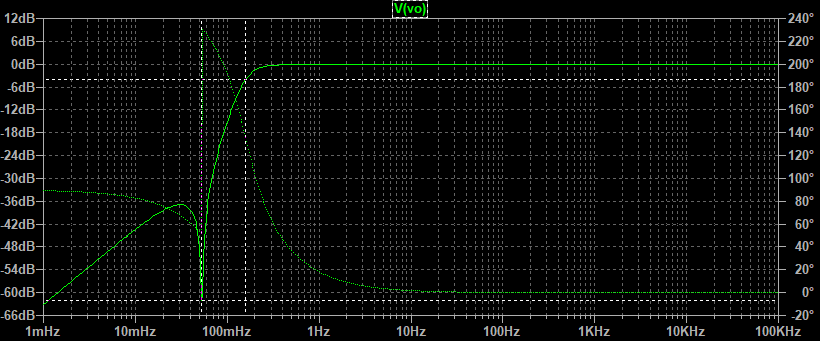

Donde vemos que tenemos el grafico con el que venimos trabajando, y en $ \omega = 1/3 $ tenemos el cero. 

La simulacion desnormalizada nos da: 

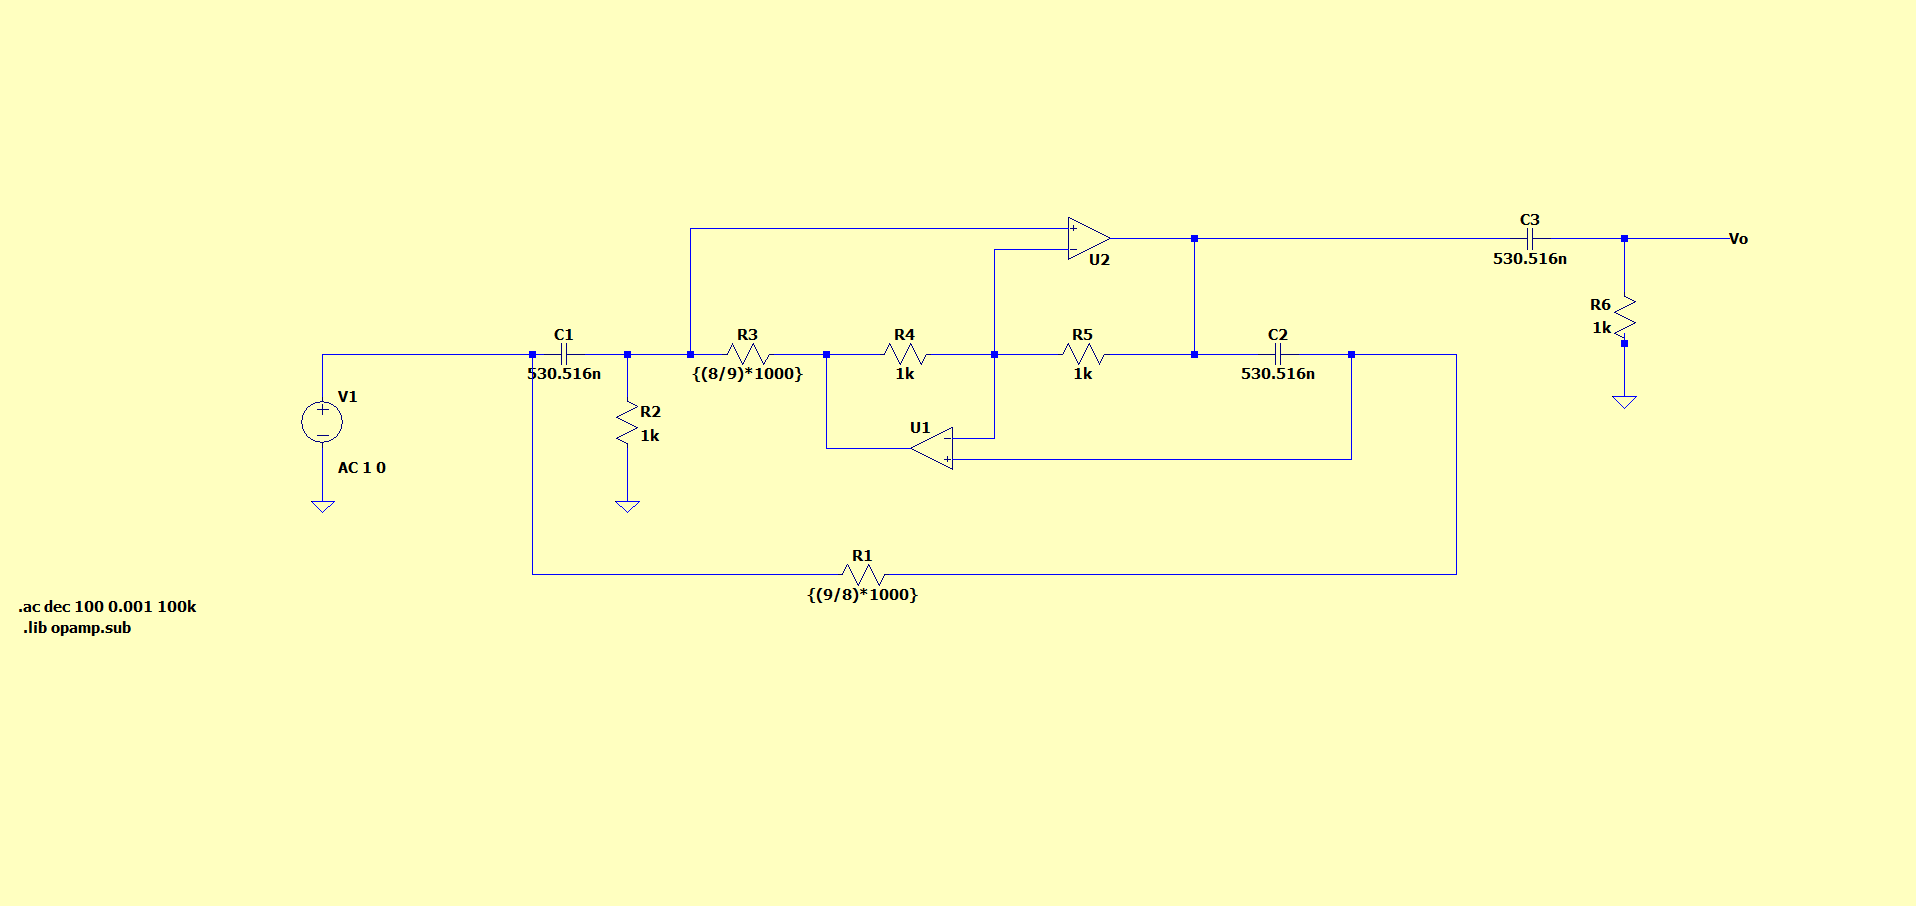

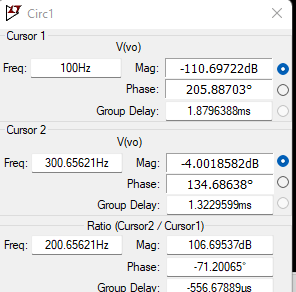

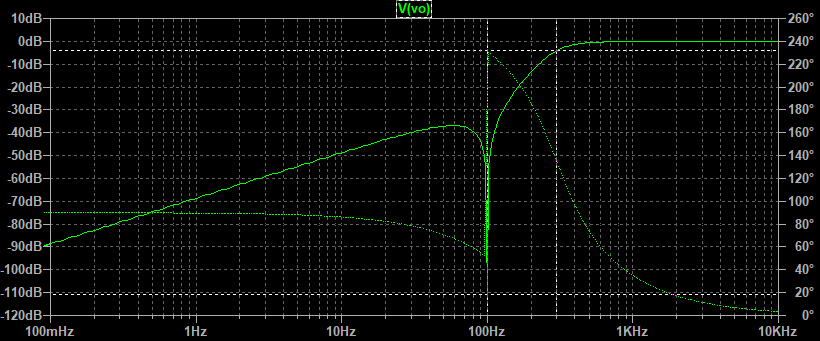

### Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

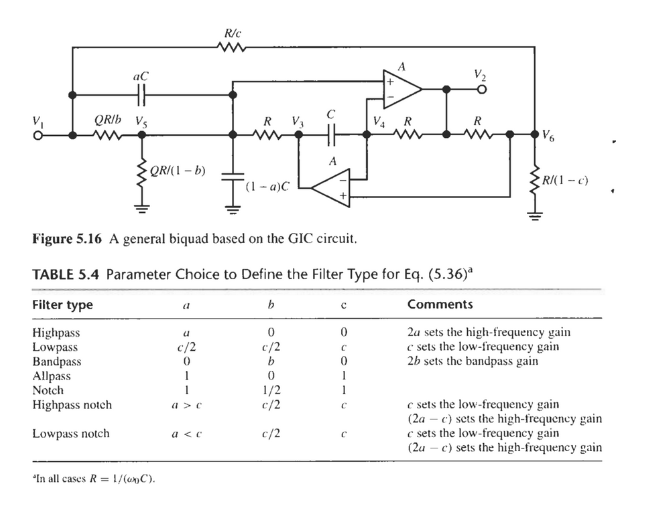

Primero que nada y siguiendo las formula de transferencia propuesta por el Schaumann: 

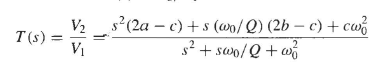

Obtenemos los valores de a, b y c: 

$$ a = 5/9 $$ 
$$ b = 1/18 $$ 
$$ c = 1/9 $$ 

Con estos valores se anula el termino lineal y nos da la transferencia obtenida en la primera parte. 

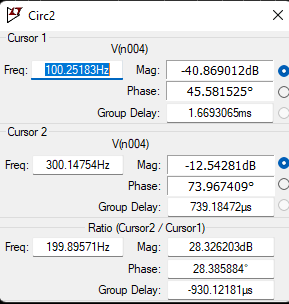
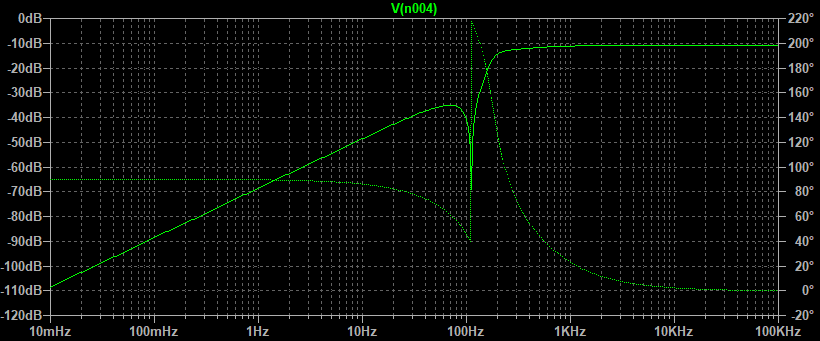



En cuanto a la comparacion vemos varias cosas evidentes, primero que ambos se basan en el GIC de Antoniou y difieren en la cantidad de componentes siendo el primero mas economico con respecto al segundo. Si entramos en las cuestiones de la respuestas, el del Schaumann provee una atenuacion del 10 dB en la banda de paso mientras que nuestro circuito se mantiene en 0 dB o en apenas unos mdB (inexistente). Por otra parte, el que nos propone el libro no es tan preciso en cuestion de las frecuencias solicitadas (100 Hz sobre todo). 